## Import the library

In [42]:
from nltk.tokenize import sent_tokenize
import re
import matplotlib.pyplot as plt
import numpy as np

# make sure that graphs are embedded into our notebook output
%matplotlib inline

## Function to tokenize sentences

In [37]:
# Tokenize the text into sentences
def tokenSentences(textIn):
    theSentences = sent_tokenize(textIn)
    return theSentences

#Tokenize for each word
def tokenizer(txt2Token): # Function for tokenizing
    theTokens = re.findall(r'\b\w[\w-]*\b', txt2Token.lower())
    return theTokens


Help on function sent_tokenize in module nltk.tokenize:

sent_tokenize(text, language='english')
    Return a sentence-tokenized copy of *text*,
    using NLTK's recommended sentence tokenizer
    (currently :class:`.PunktSentenceTokenizer`
    for the specified language).
    
    :param text: text to split into sentences
    :param language: the model name in the Punkt corpus



## Create dataset to try on

In [15]:
theText = "No food is good food. Ha. I'm on a diet and the food is awful and lame."
positiveWords=['awesome','good','nice','super','fun','delightful']
negativeWords=['awful','lame','horrible','bad']

## Creating Assoication of words

In [16]:
# Function that counts how many target words are in a list of tokens
def countSentimentalTokens(listOfTokens,listOfTargetWords):
    numTargetWords = 0
    matchedWords = []
    # Iterate through each token
    for token in listOfTokens:
        # If the token is part of the list of words we are looking for add and increment
        if token in listOfTargetWords: 
            numTargetWords += 1
            matchedWords.append(token)
    return numTargetWords, matchedWords # Note that we are returning a tuple (2 values)

## Calculating the percentage of postive and negative words

In [17]:
def calculatePercent(listOfTokens,positiveList,negativeList):
    # Get the total amount of words
    numWords = len(listOfTokens) 
    
    # Calculate postive words percent
    positiveMatches = countSentimentalTokens(listOfTokens,positiveList) 
    percntPos = positiveMatches[0] / numWords 
    
    # Calculate negative words percent
    negativeMatches = countSentimentalTokens(listOfTokens,negativeList)
    percntNeg = negativeMatches[0] / numWords 

    # Return the result of both postive and negative percent
    return percntPos, percntNeg 

## Calculate the overall sentiment

In [18]:
def calculateSentiment(percntPos,percntNeg):
    sentiment = percntPos - percntNeg # Subtract the percentage of negative words from positive words
    return sentiment

## Create a function that runs all the funtions together

In [19]:
def processText(textIn,posMatchWords,negMatchWords):
    # Tokenize the sentence
    listOfSentences = tokenSentences(textIn) 
    listOfSentiments = []
    # For every sentence
    for sentence in listOfSentences: 
        # Tokenize the sentence
        sentTokens = tokenizer(sentence)
        
        # Calculate the percent postive, negative and overall sentiment
        percentages = calculatePercent(sentTokens,posMatchWords,negMatchWords) 
        theSentiment = calculateSentiment(percentages[0],percentages[1]) 
        listOfSentiments.append(theSentiment)
        
    return listOfSentiments # Return the final list


## Creating a list of postive and negative words

In [40]:
#Text Path
postivepath = "./postive.txt"
negativepath = "./negative.txt"
tweetpath = "./obamaTweet.txt"

#Open file
with open(postivepath, "r") as file:
    postive = file.read().lower().split("\n")
    
with open(negativepath, "r") as file:
    negative = file.read().lower().split("\n")
    
with open(tweetpath, "r") as file:
    tweet = file.read().lower()
    
overall = processText(tweet, postive, negative)

## Graphing the results

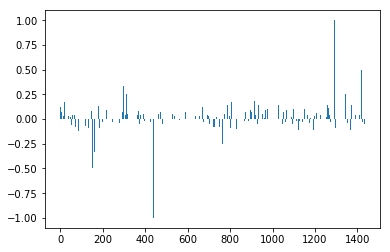

In [46]:
plt.bar(np.arange(len(overall)),overall)
plt.show()

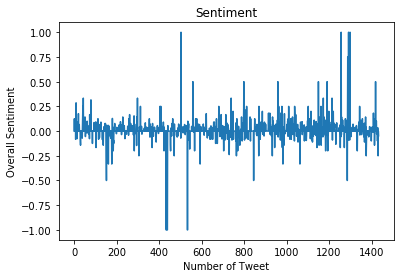

In [45]:
plt.plot(overall)

plt.xlabel('Number of Tweet') # X Axis Label
plt.ylabel('Overall Sentiment') # Y Axis Label
plt.title('Sentiment') # Plot Title


plt.show() # Show the plot.